In [1]:
!jupyter notebook --no-browser --port=8888


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-notebook` not found.


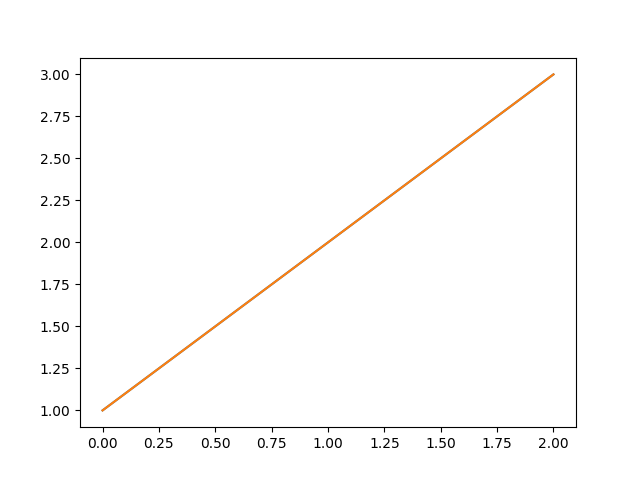

In [ ]:
! pip install ipywidgets
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot([1, 2, 3])
plt.show()

In [1]:
!pip install ipympl
%matplotlib widget

In [2]:
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401, needed for 3D projection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [ ]:
def plot_track_stability(annotation_file, N, output_dir="./plots/track_stability"):
    """
    Plot the first N track IDs' bounding boxes over time in 3D.
    Each track shows (frame, x1, y1) and (frame, x2, y2).
    Also visualizes semi-transparent "tunnels" of bbox regions.
    
    Args:
        annotation_file (str): Path to MOT-style .txt file.
        N (int): Number of unique IDs to plot.
        output_dir (str): Directory to save the plots.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    video_name = os.path.splitext(os.path.basename(annotation_file))[0]

    # Load annotations
    cols = ["frame", "id", "x", "y", "w", "h", "score", "a1", "a2", "a3"]
    df = pd.read_csv(annotation_file, header=None, names=cols)

    # Keep only first N unique IDs
    unique_ids_all = sorted(df["id"].unique())
    if len(unique_ids_all) < N:
        print(f"Only {len(unique_ids_all)} tracks available, plotting all of them.")
        unique_ids = unique_ids_all
    else:
        unique_ids = unique_ids_all[:N]

    df = df[df["id"].isin(unique_ids)]

    # Setup 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    cmap = plt.get_cmap("tab10")

    for idx, tid in enumerate(unique_ids):
        track = df[df["id"] == tid]

        frames = track["frame"].values
        x1 = track["x"].values
        y1 = track["y"].values
        x2 = (track["x"] + track["w"]).values
        y2 = (track["y"] + track["h"]).values

        color = cmap(idx % 10)

        # Lines for corners
        ax.plot(frames, x1, y1, color=color, linestyle="-")
        ax.plot(frames, x2, y2, color=color, linestyle="--")

        # "Tunnel": one translucent rectangle per frame
        for f, xx1, yy1, xx2, yy2 in zip(frames, x1, y1, x2, y2):
            rect = [
                (f, xx1, yy1),
                (f, xx2, yy1),
                (f, xx2, yy2),
                (f, xx1, yy2)
            ]
            poly = Poly3DCollection([rect], alpha=0.01, facecolor=color, edgecolor="none")
            ax.add_collection3d(poly)

    ax.set_xlabel("Frame")
    ax.set_ylabel("X coordinate")
    ax.set_zlabel("Y coordinate")
    ax.set_title(f"Track Stability (First {len(unique_ids)} IDs) – {video_name}")

    out_path = os.path.join(output_dir, f"{video_name}_ids={N}.png")
    plt.savefig(out_path, dpi=200)
    print(f"✅ Saved static 3D plot to {out_path}")

    # In Jupyter this will launch an interactive rotatable plot
    plt.show()

✅ Saved static 3D plot to ./plots/track_stability/MOT17-02-DPM_ids=5.png


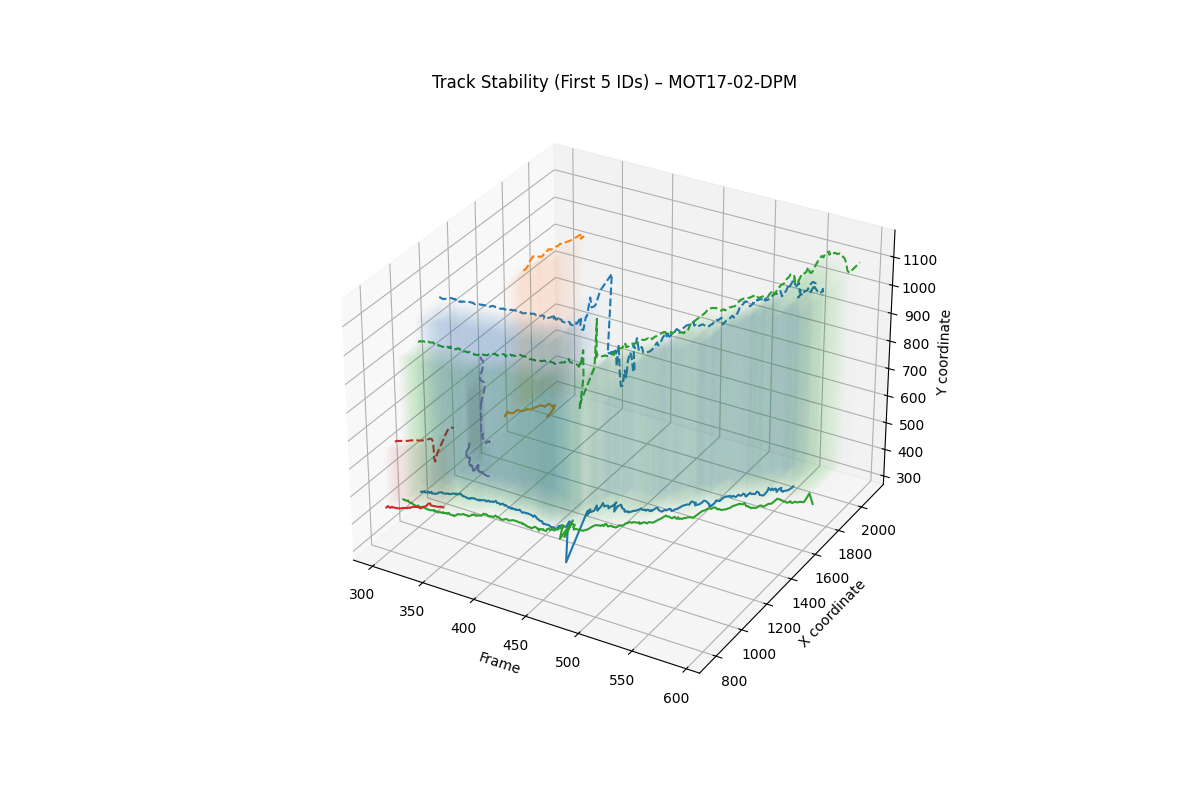

In [6]:
os.makedirs("./plots/track_stability", exist_ok=True)

annotation_file = "/home/allynbao/project/UncertaintyTrack/src/outputs/bytetrack_results/MOT17-02-DPM.txt"
N = 5

plot_track_stability(annotation_file, N, output_dir="./plots/track_stability")